# Comparison

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
with open('../../variables.pkl', 'rb') as f:
    data = pickle.load(f)

### DTW Kernel

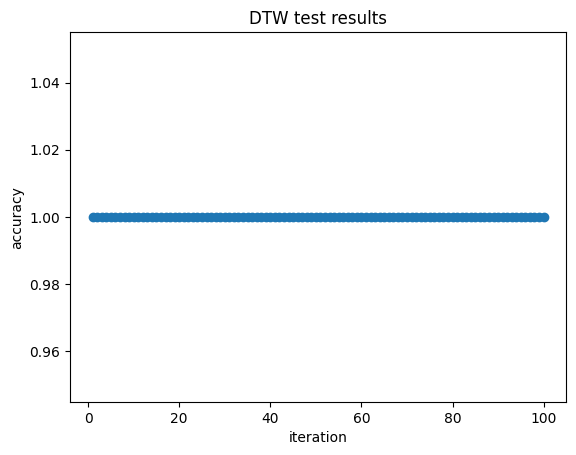

dtw_mean = 1.0
dtw_var = 0.0


In [3]:
dtw_test_result = data['dtw_test_result']
dtw_accuracies = dtw_test_result['accuracies_history']

iterations = np.arange(1,len(dtw_accuracies)+1)

plt.scatter(iterations, dtw_accuracies)
plt.title('DTW test results')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.show()


dtw_mean = np.mean(dtw_accuracies)
print(f'{dtw_mean = }')
dtw_var = np.var(dtw_accuracies)
print(f'{dtw_var = }')

## Polynomial Kernel

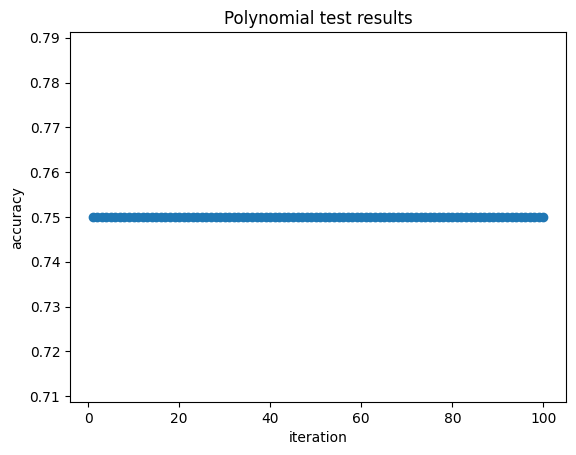

polynomial_mean = 0.75
polynomial_var = 0.0


In [4]:
polynomial_test_result = data['polynomial_test_result']
polynomial_accuracies = polynomial_test_result['accuracies_history']

iterations = np.arange(1,len(polynomial_accuracies)+1)

plt.scatter(iterations, polynomial_accuracies)
plt.title('Polynomial test results')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.show()


polynomial_mean = np.mean(polynomial_accuracies)
print(f'{polynomial_mean = }')
polynomial_var = np.var(polynomial_accuracies)
print(f'{polynomial_var = }')

## RBF Kernel

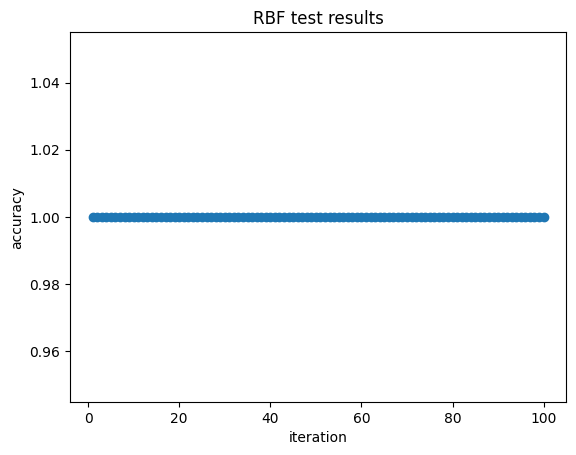

rbf_mean = 1.0
rbf_var = 0.0


In [5]:
rbf_test_result = data['rbf_test_result']
rbf_accuracies = rbf_test_result['accuracies_history']

iterations = np.arange(1,len(rbf_accuracies)+1)

plt.scatter(iterations, rbf_accuracies)
plt.title('RBF test results')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.show()


rbf_mean = np.mean(rbf_accuracies)
print(f'{rbf_mean = }')
rbf_var = np.var(rbf_accuracies)
print(f'{rbf_var = }')